In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/CustomerChurn/customer_churn_large_dataset.csv')
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [3]:
df.replace({'Female':1,'Male':0},inplace=True)

In [4]:
df.drop(['CustomerID','Name'],axis='columns',inplace=True)

In [5]:
# VIF


from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)


In [6]:
calc_vif(df)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<AxesSubplot:>

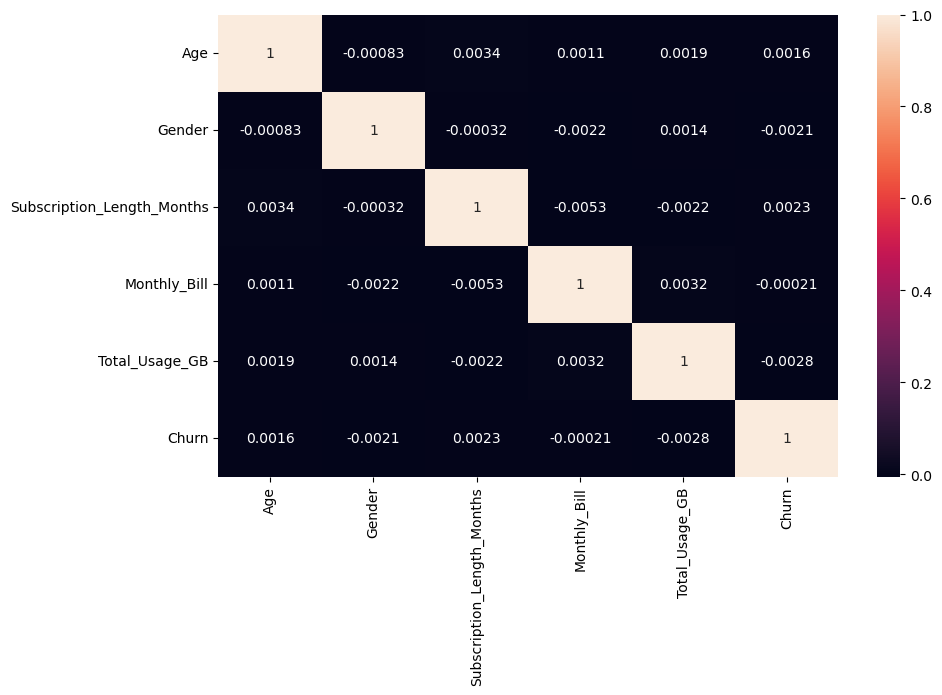

In [7]:
import seaborn as sns
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

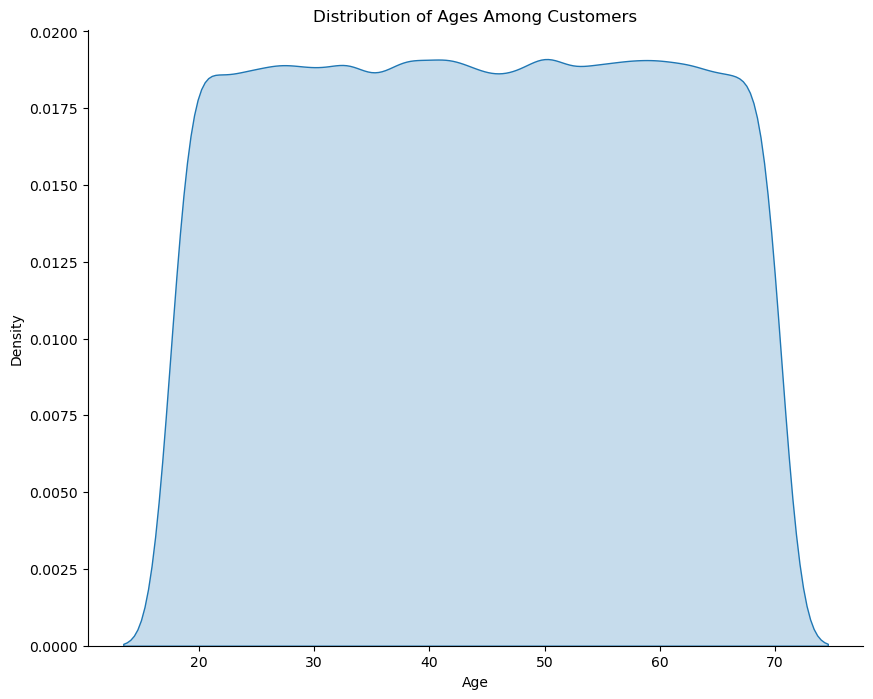

In [8]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df.Age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

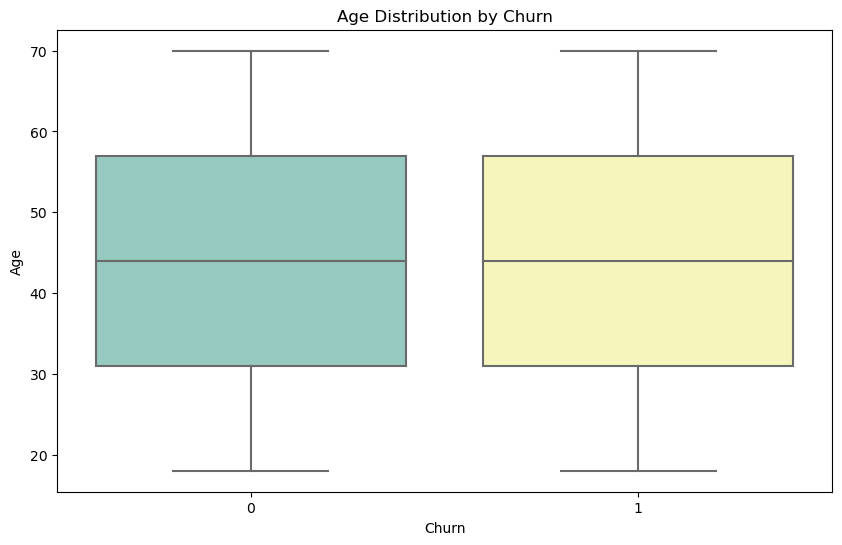

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Age', data=df, palette='Set3')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age Distribution by Churn')
plt.show()

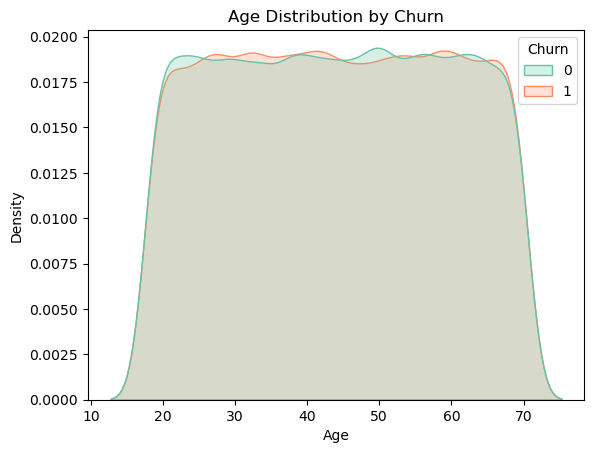

In [10]:
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()


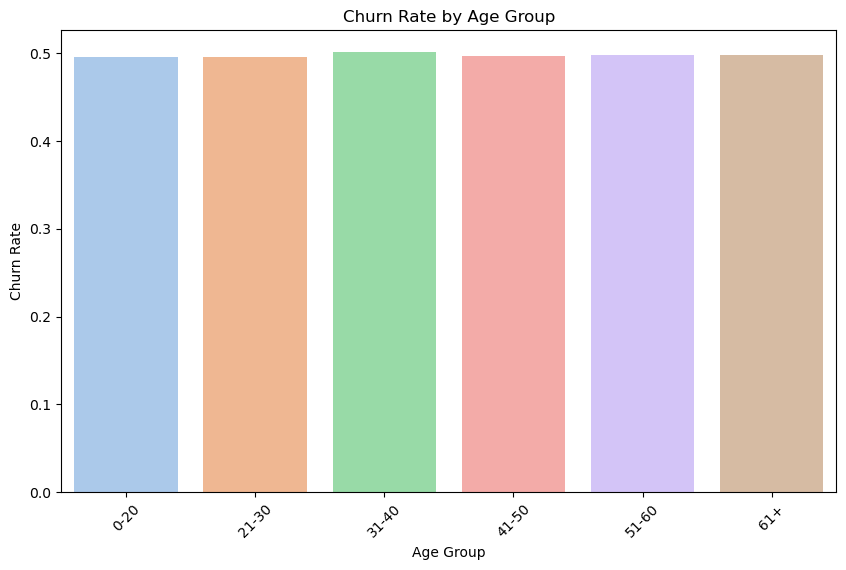

In [11]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

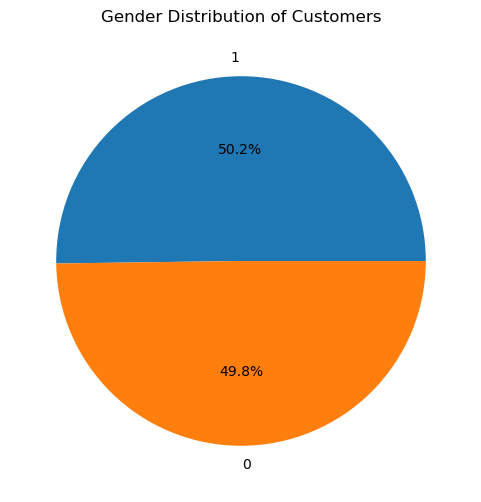

In [12]:
plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

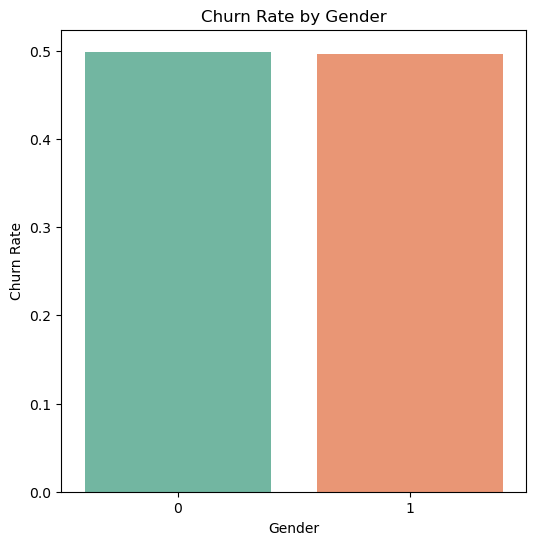

In [13]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()


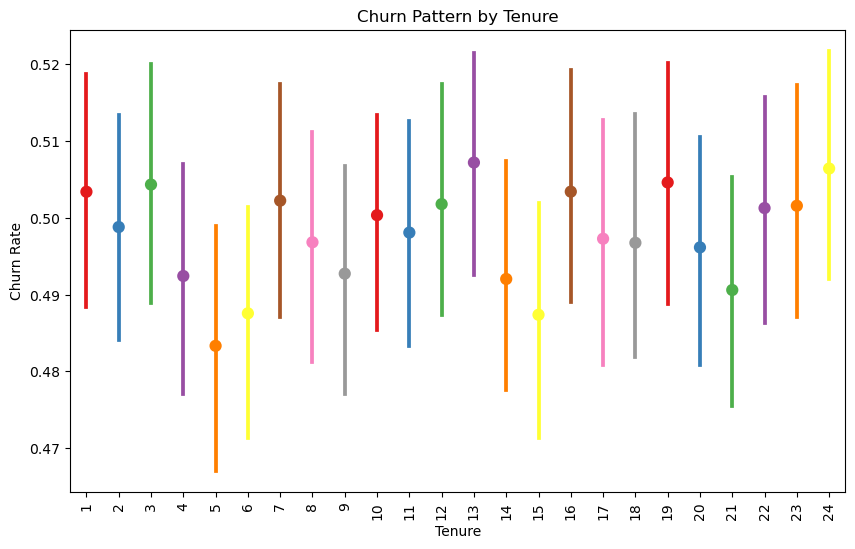

In [14]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Subscription_Length_Months', y='Churn', data=df, errorbar=None,  palette='Set1')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Tenure')
plt.xticks(rotation=90)
plt.show()

In [15]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup
0,63,0,Los Angeles,17,73.36,236,0,61+
1,62,1,New York,1,48.76,172,0,61+
2,24,1,Los Angeles,5,85.47,460,0,21-30
3,36,1,Miami,3,97.94,297,1,31-40
4,46,1,Miami,19,58.14,266,0,41-50
...,...,...,...,...,...,...,...,...
99995,33,0,Houston,23,55.13,226,1,31-40
99996,62,1,New York,19,61.65,351,0,61+
99997,64,0,Chicago,17,96.11,251,1,61+
99998,51,1,New York,20,49.25,434,1,51-60


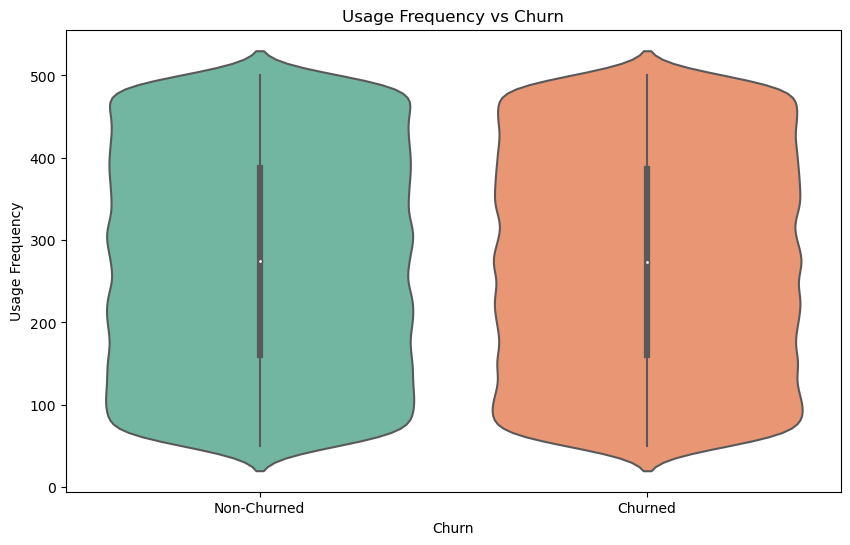

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='Total_Usage_GB', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Usage Frequency')
plt.title('Usage Frequency vs Churn')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

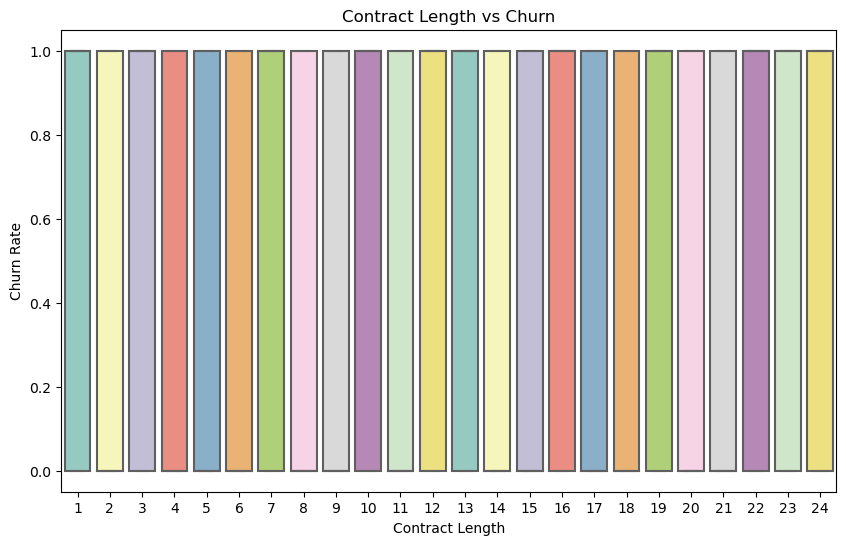

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription_Length_Months', y='Churn', data=df, palette='Set3')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.title('Contract Length vs Churn')

plt.show()

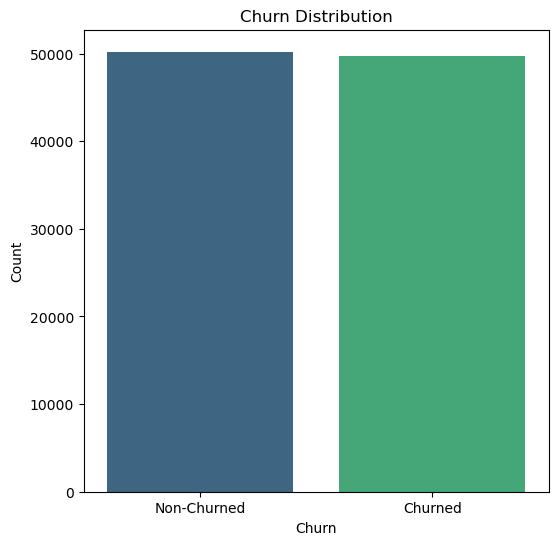

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

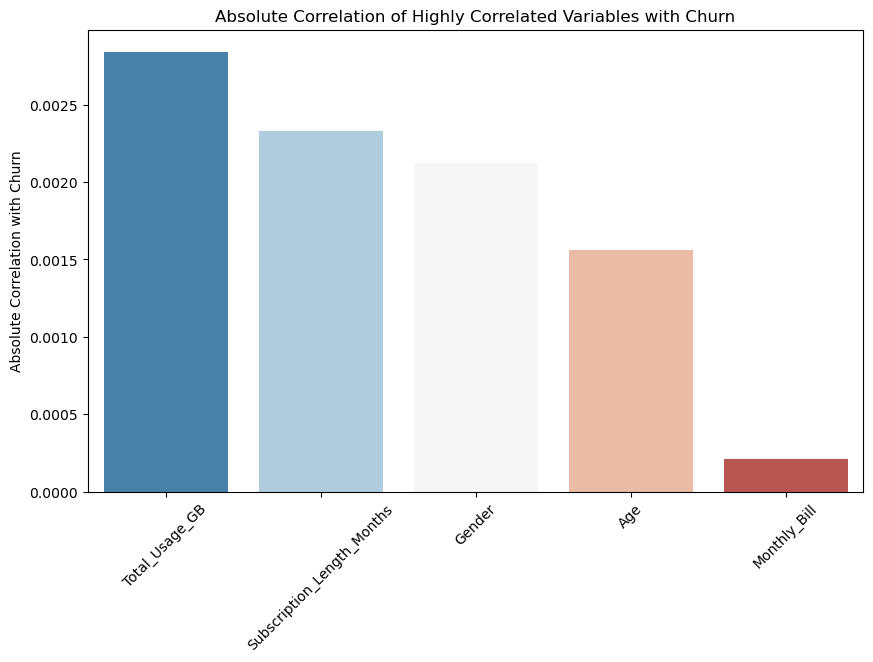

In [19]:
corr_matrix = df.corr()

high_corr_vars = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = corr_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Absolute Correlation of Highly Correlated Variables with Churn')
plt.xticks(rotation=45)
plt.show()

In [20]:
df=pd.get_dummies(data=df,columns=['Location'])
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,0,17,73.36,236,0,61+,0,0,1,0,0
1,62,1,1,48.76,172,0,61+,0,0,0,0,1
2,24,1,5,85.47,460,0,21-30,0,0,1,0,0
3,36,1,3,97.94,297,1,31-40,0,0,0,1,0
4,46,1,19,58.14,266,0,41-50,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,31-40,0,1,0,0,0
99996,62,1,19,61.65,351,0,61+,0,0,0,0,1
99997,64,0,17,96.11,251,1,61+,1,0,0,0,0
99998,51,1,20,49.25,434,1,51-60,0,0,0,0,1


In [21]:
df['Per_GB_Cost'] = df.apply(lambda x: x['Total_Usage_GB'] / x['Monthly_Bill'],axis=1)
df['Total_subscription_cost'] = df.apply(lambda x: x['Subscription_Length_Months'] * x['Monthly_Bill'],axis=1)
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost
0,63,0,17,73.36,236,0,61+,0,0,1,0,0,3.217012,1247.12
1,62,1,1,48.76,172,0,61+,0,0,0,0,1,3.527482,48.76
2,24,1,5,85.47,460,0,21-30,0,0,1,0,0,5.382005,427.35
3,36,1,3,97.94,297,1,31-40,0,0,0,1,0,3.032469,293.82
4,46,1,19,58.14,266,0,41-50,0,0,0,1,0,4.575163,1104.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,31-40,0,1,0,0,0,4.099401,1267.99
99996,62,1,19,61.65,351,0,61+,0,0,0,0,1,5.693431,1171.35
99997,64,0,17,96.11,251,1,61+,1,0,0,0,0,2.611591,1633.87
99998,51,1,20,49.25,434,1,51-60,0,0,0,0,1,8.812183,985.00


In [22]:
import pandas as pd

def detect_outliers_iqr(df, column_name, multiplier=1.5):
    """
    Detects outliers in a dataframe column using the IQR method.
    
    Parameters:
        df (pandas.DataFrame): The dataframe containing the data.
        column_name (str): The name of the column to analyze for outliers.
        multiplier (float): The multiplier to determine the outlier bounds (default is 1.5).
        
    Returns:
        pandas.DataFrame: A dataframe containing the rows that are considered outliers.
    """
    # Calculate the first quartile (25th percentile)
    Q1 = df[column_name].quantile(0.25)

    # Calculate the third quartile (75th percentile)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for potential outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    return outliers



In [23]:
outlier_1 = detect_outliers_iqr(df,'Total_subscription_cost')
outlier_1

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost
616,60,1,24,99.87,155,1,61+,0,0,0,0,1,1.552018,2396.88
805,50,1,24,99.24,153,0,51-60,0,0,0,1,0,1.541717,2381.76
5205,51,1,24,99.06,436,1,51-60,0,0,0,0,1,4.401373,2377.44
5231,34,1,24,97.40,324,0,31-40,0,0,0,0,1,3.326489,2337.60
5809,44,0,24,97.66,381,1,41-50,0,0,0,1,0,3.901290,2343.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96080,64,0,24,98.71,241,1,61+,0,0,0,1,0,2.441495,2369.04
96762,67,0,24,97.40,81,1,61+,0,0,0,1,0,0.831622,2337.60
97424,33,0,24,97.75,360,1,31-40,0,0,1,0,0,3.682864,2346.00
97502,49,1,24,97.50,437,1,41-50,1,0,0,0,0,4.482051,2340.00


In [24]:
outlier_2  = detect_outliers_iqr(df,'Per_GB_Cost')
outlier_2

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost
70,38,0,21,34.06,444,1,31-40,0,0,1,0,0,13.035819,715.26
100,59,0,20,30.93,375,1,51-60,1,0,0,0,0,12.124151,618.60
103,65,1,15,31.35,471,0,61+,1,0,0,0,0,15.023923,470.25
162,68,1,5,40.90,496,0,61+,0,0,0,1,0,12.127139,204.50
175,39,1,11,39.55,474,0,31-40,0,1,0,0,0,11.984829,435.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,43,1,6,31.44,442,1,41-50,0,0,1,0,0,14.058524,188.64
99961,20,1,21,30.03,425,0,21-30,0,0,1,0,0,14.152514,630.63
99963,19,1,2,30.64,414,1,0-20,1,0,0,0,0,13.511749,61.28
99970,19,0,1,32.27,439,1,0-20,0,0,1,0,0,13.603967,32.27


In [25]:
outlier = pd.concat([outlier_1,outlier_2])
outlier

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost
616,60,1,24,99.87,155,1,61+,0,0,0,0,1,1.552018,2396.88
805,50,1,24,99.24,153,0,51-60,0,0,0,1,0,1.541717,2381.76
5205,51,1,24,99.06,436,1,51-60,0,0,0,0,1,4.401373,2377.44
5231,34,1,24,97.40,324,0,31-40,0,0,0,0,1,3.326489,2337.60
5809,44,0,24,97.66,381,1,41-50,0,0,0,1,0,3.901290,2343.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99950,43,1,6,31.44,442,1,41-50,0,0,1,0,0,14.058524,188.64
99961,20,1,21,30.03,425,0,21-30,0,0,1,0,0,14.152514,630.63
99963,19,1,2,30.64,414,1,0-20,1,0,0,0,0,13.511749,61.28
99970,19,0,1,32.27,439,1,0-20,0,0,1,0,0,13.603967,32.27


In [26]:
df = df[~df.index.isin(outlier.index)]
df

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost
0,63,0,17,73.36,236,0,61+,0,0,1,0,0,3.217012,1247.12
1,62,1,1,48.76,172,0,61+,0,0,0,0,1,3.527482,48.76
2,24,1,5,85.47,460,0,21-30,0,0,1,0,0,5.382005,427.35
3,36,1,3,97.94,297,1,31-40,0,0,0,1,0,3.032469,293.82
4,46,1,19,58.14,266,0,41-50,0,0,0,1,0,4.575163,1104.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,31-40,0,1,0,0,0,4.099401,1267.99
99996,62,1,19,61.65,351,0,61+,0,0,0,0,1,5.693431,1171.35
99997,64,0,17,96.11,251,1,61+,1,0,0,0,0,2.611591,1633.87
99998,51,1,20,49.25,434,1,51-60,0,0,0,0,1,8.812183,985.00


In [27]:
import pandas as pd

def detect_outliers_iqr(df, column_name, multiplier=1.5):
    """
    Detects outliers in a dataframe column using the IQR method.
    
    Parameters:
        df (pandas.DataFrame): The dataframe containing the data.
        column_name (str): The name of the column to analyze for outliers.
        multiplier (float): The multiplier to determine the outlier bounds (default is 1.5).
        
    Returns:
        pandas.DataFrame: A dataframe containing the rows that are considered outliers.
    """
    # Calculate the first quartile (25th percentile)
    Q1 = df[column_name].quantile(0.25)

    # Calculate the third quartile (75th percentile)
    Q3 = df[column_name].quantile(0.75)

   
    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    return outliers



In [28]:
Important_customers = df['Total_subscription_cost'].quantile(.75)
Important_customers

1176.325

In [29]:
df['Important_customers'] = df['Total_subscription_cost']>Important_customers
df

C:\Users\Vineet Roy\AppData\Local\Temp\ipykernel_24716\3554388644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Important_customers'] = df['Total_subscription_cost']>Important_customers


,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost,Important_customers
0,63,0,17,73.36,236,0,61+,0,0,1,0,0,3.217012,1247.12,True
1,62,1,1,48.76,172,0,61+,0,0,0,0,1,3.527482,48.76,False
2,24,1,5,85.47,460,0,21-30,0,0,1,0,0,5.382005,427.35,False
3,36,1,3,97.94,297,1,31-40,0,0,0,1,0,3.032469,293.82,False
4,46,1,19,58.14,266,0,41-50,0,0,0,1,0,4.575163,1104.66,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,31-40,0,1,0,0,0,4.099401,1267.99,True
99996,62,1,19,61.65,351,0,61+,0,0,0,0,1,5.693431,1171.35,False
99997,64,0,17,96.11,251,1,61+,1,0,0,0,0,2.611591,1633.87,True
99998,51,1,20,49.25,434,1,51-60,0,0,0,0,1,8.812183,985.00,False


In [30]:
#Focus Area

df['Important_customers'] = df['Important_customers'].astype(int)
df

C:\Users\Vineet Roy\AppData\Local\Temp\ipykernel_24716\2402869826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Important_customers'] = df['Important_customers'].astype(int)


,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,AgeGroup,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Per_GB_Cost,Total_subscription_cost,Important_customers
0,63,0,17,73.36,236,0,61+,0,0,1,0,0,3.217012,1247.12,1
1,62,1,1,48.76,172,0,61+,0,0,0,0,1,3.527482,48.76,0
2,24,1,5,85.47,460,0,21-30,0,0,1,0,0,5.382005,427.35,0
3,36,1,3,97.94,297,1,31-40,0,0,0,1,0,3.032469,293.82,0
4,46,1,19,58.14,266,0,41-50,0,0,0,1,0,4.575163,1104.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33,0,23,55.13,226,1,31-40,0,1,0,0,0,4.099401,1267.99,1
99996,62,1,19,61.65,351,0,61+,0,0,0,0,1,5.693431,1171.35,0
99997,64,0,17,96.11,251,1,61+,1,0,0,0,0,2.611591,1633.87,1
99998,51,1,20,49.25,434,1,51-60,0,0,0,0,1,8.812183,985.00,0


In [31]:
x=df.drop(['AgeGroup','Churn'],axis='columns')
y=df.Churn

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape

(77557, 13)

In [34]:
X_train.dtypes

Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Location_Chicago                uint8
Location_Houston                uint8
Location_Los Angeles            uint8
Location_Miami                  uint8
Location_New York               uint8
Per_GB_Cost                   float64
Total_subscription_cost       float64
Important_customers             int32
dtype: object

In [35]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [36]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
}

In [37]:
model = LogisticRegression()

In [38]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [39]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


In [40]:
hyper_model = LogisticRegression(C=.01,max_iter=100,solver='liblinear')
hyper_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [41]:
# Model score on the test dataset
hyper_model.score(X_test,y_test)

0.5036101083032491

In [42]:
y_pred = hyper_model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55      9764
           1       0.50      0.41      0.45      9626

    accuracy                           0.50     19390
   macro avg       0.50      0.50      0.50     19390
weighted avg       0.50      0.50      0.50     19390



In [44]:
import pickle
filename = 'model.pkl'

In [45]:
pickle.dump(hyper_model, open(filename, 'wb'))

In [46]:
load_model = pickle.load(open(filename, 'rb'))

In [47]:
load_model.score(X_test,y_test)

0.5036101083032491